In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Understanding

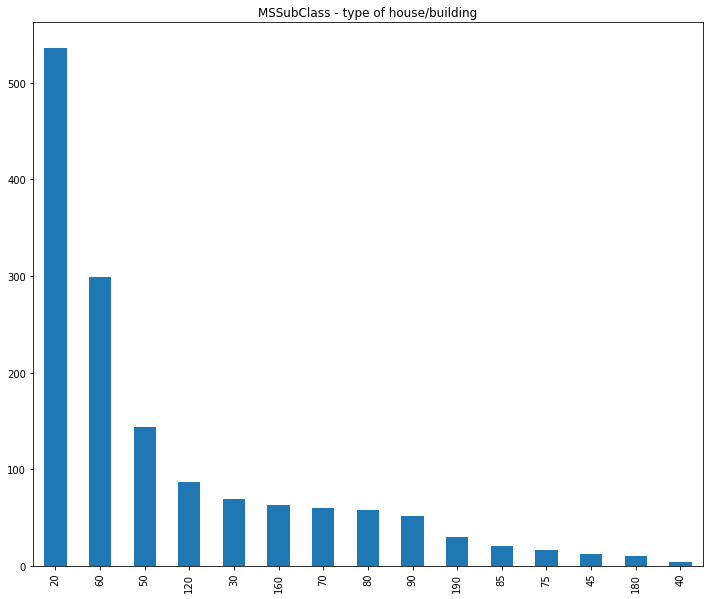

In [8]:
# MSSubClass - type of house/building
df['MSSubClass'].value_counts().plot(kind='bar', figsize=(12,10), title="MSSubClass - type of house/building")
plt.show()
# 20	1-STORY 1946 & NEWER ALL STYLES
# 60	2-STORY 1946 & NEWER
# 50	1-1/2 STORY FINISHED ALL AGES


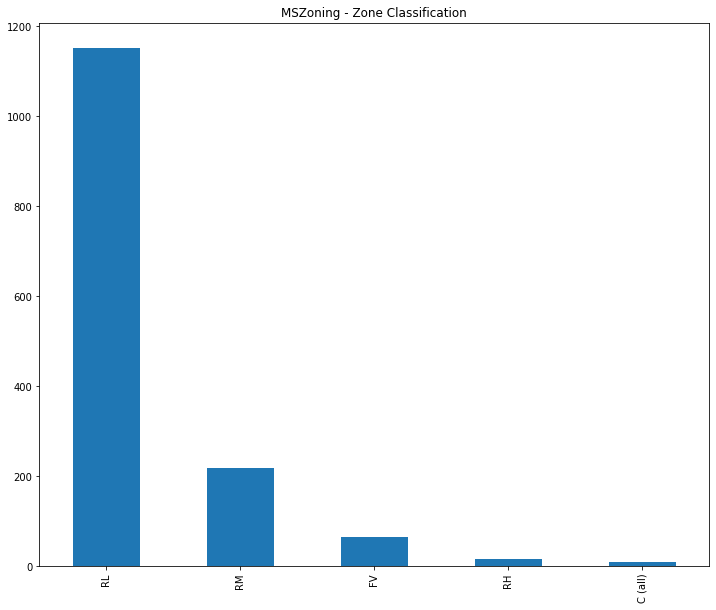

In [9]:
# MSZoning: Identifies the general zoning classification of the sale
df['MSZoning'].value_counts().plot(kind='bar', figsize=(12,10), title="MSZoning - Zone Classification")
plt.show()
# RL	Residential Low Density
# RM	Residential Medium Density


Most of the sales occurred in Residential Low and medium density zones

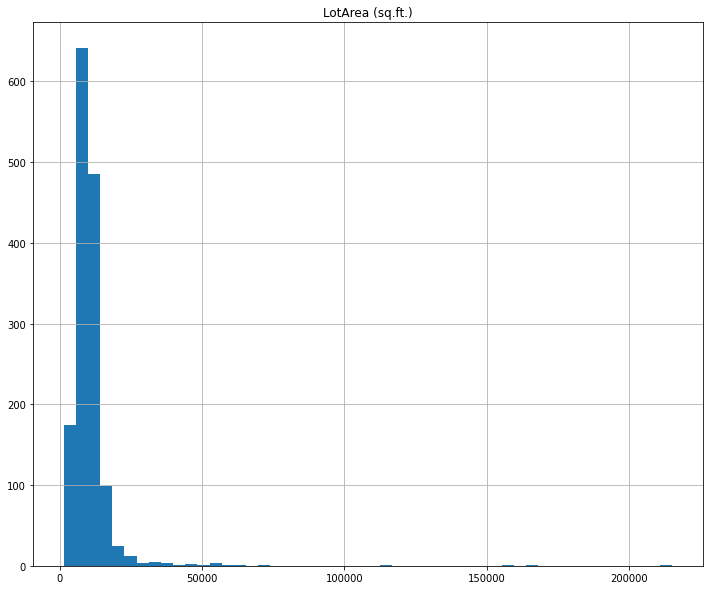

In [17]:
# LotArea - sq.ft.
df['LotArea'].hist(figsize=(12,10), bins=50)
plt.title("LotArea (sq.ft.)")
plt.show()

most of them are under 25k sq.ft. with a lot of outliers

In [18]:
# Condition2: Proximity to various conditions (if more than one is present)
df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

Almost all are normal

## Data Exploration

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Correlation with numeric variables

In [20]:
numerics = df.select_dtypes(include=['float64', 'int64'])
numerics

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
numerics.nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [27]:
numerics[numerics.nunique()[numerics.nunique()<=10].index]

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
0,7,5,1,0,2,1,3,1,0,2,0,2008
1,6,8,0,1,2,0,3,1,1,2,0,2007
2,7,5,1,0,2,1,3,1,1,2,0,2008
3,7,5,1,0,1,0,3,1,1,3,0,2006
4,8,5,1,0,2,1,4,1,1,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0,0,2,1,3,1,1,2,0,2007
1456,6,6,1,0,2,0,3,1,2,2,0,2010
1457,7,9,0,0,2,0,4,1,2,1,0,2010
1458,5,6,1,0,1,0,2,1,0,1,0,2010


* 'Id' is an identifier column and would not be considered.
* Similarly BsmtHalfBath, HalfBath, FullBath, Fireplaces, KitchenAbvGr, BsmtFullBath, GarageCars, YrSold, BedroomAbvGr, PoolArea, OverallCond, OverallQual are integer type with <= 5 uniques. We are not going to consider them.

In [28]:
cols_to_drop = ["Id"]
non_numeric_cols = "BsmtHalfBath, HalfBath, FullBath, Fireplaces, KitchenAbvGr, BsmtFullBath, GarageCars, YrSold, BedroomAbvGr, PoolArea, OverallCond, OverallQual".split(", ")
numerics[cols_to_drop+non_numeric_cols]


,Id,BsmtHalfBath,HalfBath,FullBath,Fireplaces,KitchenAbvGr,BsmtFullBath,GarageCars,YrSold,BedroomAbvGr,PoolArea,OverallCond,OverallQual
0,1,0,1,2,0,1,1,2,2008,3,0,5,7
1,2,1,0,2,1,1,0,2,2007,3,0,8,6
2,3,0,1,2,1,1,1,2,2008,3,0,5,7
3,4,0,0,1,1,1,1,3,2006,3,0,5,7
4,5,0,1,2,1,1,1,3,2008,4,0,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0,1,2,1,1,0,2,2007,3,0,5,6
1456,1457,0,0,2,2,1,1,2,2010,3,0,6,6
1457,1458,0,0,2,2,1,0,1,2010,4,0,9,7
1458,1459,0,0,1,0,1,1,1,2010,2,0,6,5


Dropping these columns and finding correlations

In [35]:
numerics = numerics.drop(cols_to_drop+non_numeric_cols, axis=1)
corr = numerics.corr().round(2)

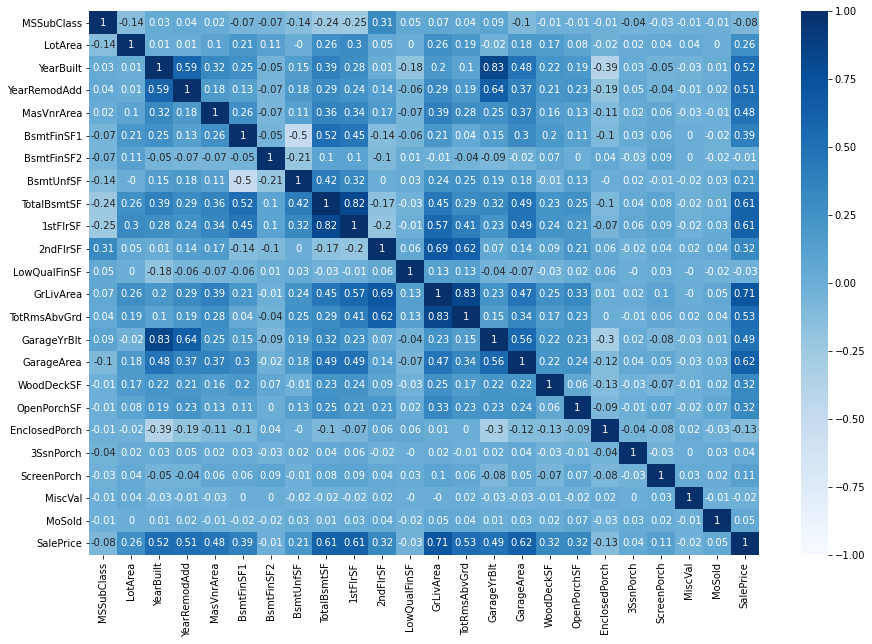

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Blues", annot=True, vmin=-1, vmax=1)
plt.show() #2ndFlrSF, GrLivArea

* There are many variables which are correlated with the SalePrice. GrLivArea(Ground living area) has the highest correlation.
* Other highly correlated ones are YearBuilt, YearRemodAdd, MasVnrArea(Masonry veneer area), TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd, GarageArea.
* GarageYrBlt is correlated high with YrBuilt and YearRemodAdd
* 2ndFlrSF is highly correlated with GrLivArea and TotRmsAbvGrd
* BsmtUnfSF (Unfinished square feet of basement) has high negative correlation with BsmtFinSF1(Type 1 finished square feet). So is EnclosedPorch with YearBuilt.

## Converting pseudo-numerics to categoricals

In [37]:
df[non_numeric_cols] = df[non_numeric_cols].astype('object')
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold           object
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 75, dtype: object

In [38]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
406,407,50,RL,10480,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,115000
1031,1032,75,RL,15863,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,197000
1426,1427,60,RL,10944,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,WD,Normal,271000
109,110,20,RL,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
1183,1184,30,RL,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,120000


## Dropping columns with high-cardinatlity - Id

In [52]:
df.drop('Id', axis=1, inplace=True)

## Treating Null Values

### Plot the null value percentage

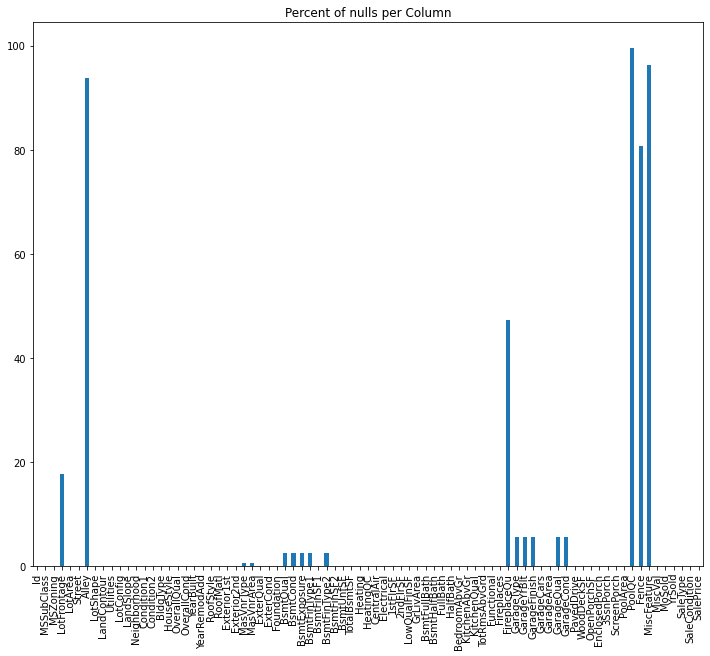

In [4]:
null_value_percentage = (df.isnull().mean(axis=0)*100).round(1)
null_value_percentage.plot(kind='bar', figsize=(12,10), title="Percent of nulls per Column")
plt.show()

### Let's drop those cols which contain more than 10% nulls

In [5]:
print(df.shape)
df = df[null_value_percentage[null_value_percentage<10].index]
print(df.shape)


(1460, 81)
(1460, 75)


Let's plot number of nulls now

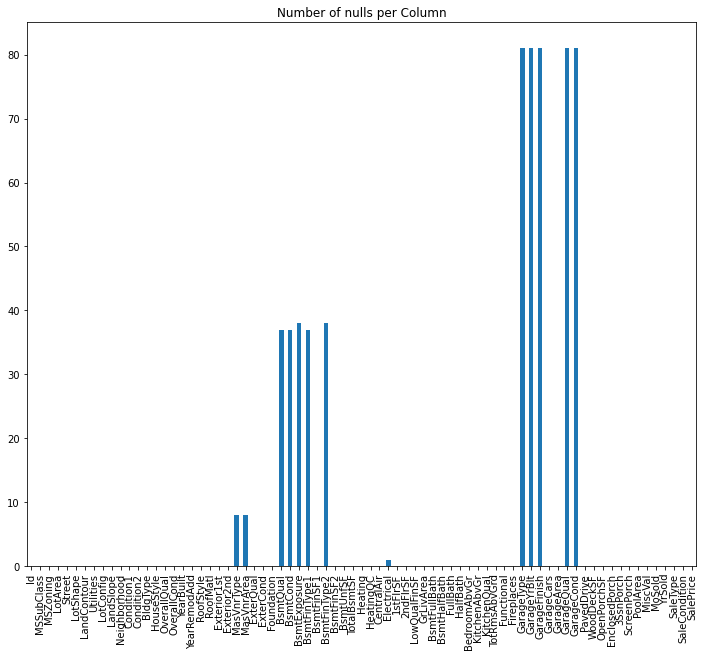

In [6]:
null_value_number = df.isnull().sum(axis=0)
null_value_number.plot(kind='bar', figsize=(12,10), title="Number of nulls per Column")
plt.show()

In [42]:
dtypes = df.dtypes
categorical_dtypes = dtypes[dtypes=='object'].index
categorical_dtypes

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolArea', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

Imputing categoricals using mode and numerics with median for the remaining columns.

In [43]:
df[categorical_dtypes] = df[categorical_dtypes].fillna(df[categorical_dtypes].mode().iloc[0])

In [44]:
numeric_dtypes = df.drop(categorical_dtypes, axis=1).columns
df[numeric_dtypes] = df[numeric_dtypes].fillna(df[numeric_dtypes].median())

Since imputation is done, checking if there are any nulls still

In [45]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

## One-hot encoding

In [53]:
df.shape

(1460, 74)

In [54]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape

(1460, 232)

In [55]:
df_encoded.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

## Scaling

In [57]:
target = 'SalePrice'
X, y = df_encoded.drop(target, axis=1), df_encoded[target]

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [60]:
X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, train_size=0.7, random_state=42)

## Model Building and Evaluation

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

def fit_model_and_get_metrics(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    tr_preds = model.predict(X_tr)
    te_preds = model.predict(X_te)
    tr_r2 = r2_score(y_tr, tr_preds)
    te_r2 = r2_score(y_te, te_preds)
    tr_rmse = np.sqrt(mean_squared_error(y_tr, tr_preds))
    te_rmse = np.sqrt(mean_squared_error(y_te, te_preds))
    return model, {'Train R-squared': tr_r2, 'Test R-squared':te_r2, 'Train RMSE':tr_rmse, 'Test RMSE':te_rmse}

Let's form a baseline first to see how well linear regression model performs

In [65]:
model = LinearRegression()
lr_model,linear_regression_metrics = fit_model_and_get_metrics(model, X_tr, X_te, y_tr, y_te)
linear_regression_metrics

{'Train R-squared': 0.9333731833760898,
 'Test R-squared': -2773344930059926.5,
 'Train RMSE': 20034.664503287182,
 'Test RMSE': 4394178527906.777}

We have very high negative value of test r-squared. This could be bacause of the bad fit or due to overflow in calculations. Never-the-less there seems to be overfitting looking at the smaller value of train rmse compared to test.

### Fitting Ridge model

In [71]:
from sklearn.model_selection import GridSearchCV
hyperparams = {'alpha': [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10, 20, 50, 100, 1000]}
ridge = Ridge()
ridge_cv = GridSearchCV(
    estimator = ridge, 
    param_grid = hyperparams, 
    scoring= 'neg_mean_squared_error',  
    cv = 5, 
    return_train_score=True,
    verbose = 1
)    
ridge_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   20, 50, 100, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [72]:
ridge_cv.best_params_

{'alpha': 10}

In [82]:
ridge_model = Ridge(alpha=10)
ridge_model, ridge_metrics = fit_model_and_get_metrics(ridge_model, X_tr, X_te, y_tr, y_te)
ridge_metrics

{'Train R-squared': 0.8812002148063836,
 'Test R-squared': 0.8613153676412659,
 'Train RMSE': 26752.56144084877,
 'Test RMSE': 31073.48213441446}

From looking at the train and test metrics, it can be observed this ridge model is more generalizable.

Let's try LASSO now

In [77]:
from sklearn.model_selection import GridSearchCV
hyperparams = {'alpha': [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10, 20, 50, 100, 1000]}
lasso = Lasso()
lasso_cv = GridSearchCV(
    estimator = lasso, 
    param_grid = hyperparams, 
    scoring= 'neg_mean_squared_error',  
    cv = 5, 
    return_train_score=True,
    verbose = 1
)    
lasso_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153501393090.4378, tolerance: 473707820.6681136
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121170229890.98027, tolerance: 484450201.7131684
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124812675458.57043, tolerance: 484196490.78364605
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124724056279.31406, tolerance: 484196490.78364605
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167128810095.0254, tolerance: 506318250.1610167
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150639237300.92093, tolerance: 511300939.7160337
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107285558665.15875, tolerance: 511300939.7160337
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8947525951.69522, tolerance: 473707820.6681136
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16100905955.792633, tolerance: 484450201.7131684
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   20, 50, 100, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [78]:
lasso_cv.best_params_

{'alpha': 100}

In [79]:
lasso_model = Lasso(alpha=100)
lasso_model, lasso_metrics = fit_model_and_get_metrics(lasso_model, X_tr, X_te, y_tr, y_te)
lasso_metrics

{'Train R-squared': 0.890860040874442,
 'Test R-squared': 0.8754379259793063,
 'Train RMSE': 25641.854755181736,
 'Test RMSE': 29448.872328543894}

Even the metrics of LASSO signify that this model is also generalizing well. In fact, these are better than that of Ridge.

### Identifying important variables

In [81]:
def identify_imp_variables(model, features):
    coefficients = np.abs(model.coef_)
    coefficients = pd.Series(coefficients, index=features)
    return coefficients.sort_values(ascending=False)


In [83]:
# ridge
identify_imp_variables(ridge_model, X_tr.columns)

OverallQual             50371.915565
2ndFlrSF                39806.422435
GrLivArea               36534.625889
Neighborhood_NoRidge    35971.824815
TotRmsAbvGrd            35378.299738
                            ...     
RoofMatl_Membran            0.000000
Exterior1st_ImStucc         0.000000
Condition2_RRNn             0.000000
Condition2_PosA             0.000000
Electrical_Mix              0.000000
Length: 231, dtype: float64

Important Variables for Ridge:
* OverallQual (overall material and finish)
* 2ndFlrSF (Second floor square feet)
* GrLivArea (Ground Living Area)
* Neighborhood_NoRidge(Northridge neighborhood)
* TotRmsAbvGrd (Total rooms above grade)

In [84]:
# lasso
identify_imp_variables(lasso_model, X_tr.columns) 

GrLivArea               141087.329776
OverallQual              92974.378361
Condition2_PosN          78961.522267
Neighborhood_NoRidge     47155.143224
GarageCars               45352.775231
                            ...      
Exterior1st_BrkComm          0.000000
BedroomAbvGr                 0.000000
Exterior1st_CBlock           0.000000
Exterior1st_ImStucc          0.000000
Exterior1st_AsphShn          0.000000
Length: 231, dtype: float64

Top predictors for LASSO are 
* GrLivArea(Ground Living Area), 
* OverallQual(overall material and finish), 
* Condition2_PosN(Near positive off-site feature--park, greenbelt), 
* Neighborhood_NoRidge(Northridge neighborhood), 
* GarageCars (Garage capacity)

Most of the top important variables are same between the models. 
But we have, with Ridge, 2ndFlrSF, TotRmsAbvGrd and GrLivArea in top-5 which are correlated.

## Subjective Questions

What happens if we double the optimal values of alpha for Ridge and LASSO?

In [87]:
# Ridge
ridge_model2 = Ridge(alpha=20)
ridge_model2, ridge_metrics2 = fit_model_and_get_metrics(ridge_model2, X_tr, X_te, y_tr, y_te)
print(ridge_metrics2)
identify_imp_variables(ridge_model2, X_tr.columns) 


{'Train R-squared': 0.8637865419752311, 'Test R-squared': 0.8491587814649583, 'Train RMSE': 28646.235087122022, 'Test RMSE': 32406.77171710907}


OverallQual             40366.288869
2ndFlrSF                30797.231563
TotRmsAbvGrd            30334.047114
Neighborhood_NoRidge    29580.317402
GrLivArea               29492.518679
                            ...     
Condition2_RRNn             0.000000
RoofMatl_Membran            0.000000
Condition2_PosA             0.000000
Exterior1st_ImStucc         0.000000
Electrical_Mix              0.000000
Length: 231, dtype: float64

In [88]:
# LASSO
lasso_model2 = Lasso(alpha=200)
lasso_model2, lasso_metrics2 = fit_model_and_get_metrics(lasso_model2, X_tr, X_te, y_tr, y_te)
print(lasso_metrics2)
identify_imp_variables(lasso_model2, X_tr.columns) 


{'Train R-squared': 0.87443468418242, 'Test R-squared': 0.866111616570866, 'Train RMSE': 27503.780229993838, 'Test RMSE': 30531.43400233015}


GrLivArea               126701.483872
OverallQual              98644.504683
GarageCars               48499.478575
Neighborhood_NoRidge     45061.801658
Neighborhood_StoneBr     38899.134677
                            ...      
RoofMatl_Metal               0.000000
RoofMatl_Roll                0.000000
RoofMatl_Tar&Grv             0.000000
RoofMatl_WdShake             0.000000
Exterior1st_AsphShn          0.000000
Length: 231, dtype: float64

Retraining LASSO xcluding the top 5 important varaibles

In [90]:
prev_imp_vars_lasso = ["GrLivArea", "OverallQual", "Condition2_PosN", "Neighborhood_NoRidge", "GarageCars"]
X_tr_ = X_tr.drop(prev_imp_vars_lasso, axis=1)
X_te_ = X_te.drop(prev_imp_vars_lasso, axis=1)


In [91]:
hyperparams = {'alpha': [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10, 20, 50, 100, 1000]}
lasso_ = Lasso()
lasso_cv_ = GridSearchCV(
    estimator = lasso_, 
    param_grid = hyperparams, 
    scoring= 'neg_mean_squared_error',  
    cv = 5, 
    return_train_score=True,
    verbose = 1
)    
lasso_cv_.fit(X_tr_, y_tr)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172490083094.7627, tolerance: 473707820.6681136
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126594771657.22415, tolerance: 484450201.7131684
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166847825530.38382, tolerance: 484196490.78364605
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166727463348.5222, tolerance: 484196490.78364605
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183533643022.0963, tolerance: 506318250.1610167
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173155975910.30798, tolerance: 511300939.7160337
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119452251592.78265, tolerance: 511300939.7160337
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11582752065.287445, tolerance: 473707820.6681136
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22432974452.231995, tolerance: 484450201.7131684
  model = cd_fast.enet_coordinate_descent(
C:\Users\nkothapalli\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   20, 50, 100, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [92]:
lasso_cv_.best_params_


{'alpha': 100}

In [93]:
lasso_model_ = Lasso(alpha=100)
lasso_model_, lasso_metrics_ = fit_model_and_get_metrics(lasso_model_, X_tr_, X_te_, y_tr, y_te)
lasso_metrics_

{'Train R-squared': 0.8740564837843279,
 'Test R-squared': 0.8606073168553474,
 'Train RMSE': 27545.169524979687,
 'Test RMSE': 31152.703575094492}

In [94]:
identify_imp_variables(lasso_model_, X_tr_.columns) 

1stFlrSF               138498.431302
2ndFlrSF               111448.749328
RoofMatl_WdShngl        53181.129272
GarageArea              46644.483697
Exterior2nd_ImStucc     46286.602150
                           ...      
Exterior2nd_AsphShn         0.000000
Exterior1st_WdShing         0.000000
Exterior1st_Stucco          0.000000
Exterior1st_Stone           0.000000
Exterior1st_CBlock          0.000000
Length: 226, dtype: float64